Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Epoch 1/25
205/205 [==============================] - 921s 4s/step - loss: 1.5084 - accuracy: 0.5190 - val_loss: 1.1551 - val_accuracy: 0.5027
Epoch 2/25
205/205 [==============================] - 853s 4s/step - loss: 0.9014 - accuracy: 0.5843 - val_loss: 0.9327 - val_accuracy: 0.5715
Epoch 3/25
205/205 [==============================] - 767s 4s/step - loss: 0.8495 - accuracy: 0.6009 - val_loss: 1.0349 - val_accuracy: 0.4965
Epoch 4/25
205/205 [==============================] - 754s 4s/step - loss: 0.8246 - accuracy: 0.6208 - val_loss: 0.9571 - val_accuracy: 0.5567
Epoch 5/25
205/205 [==============================] - 654s 3s/step - loss: 0.7959 - accuracy: 0.6348 - val_loss: 1.0397 - val_accuracy: 0.5434
Epoch 6/25
205/205 [==============================] - 632s 3s/step - loss: 0.7729 - accuracy: 0.6405 - val_loss: 0.9919 - val_accuracy: 0.5637
Epoch 7/25
205/205 [==============================] - 4052

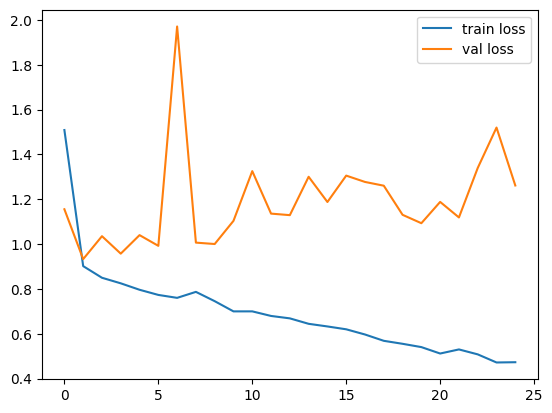

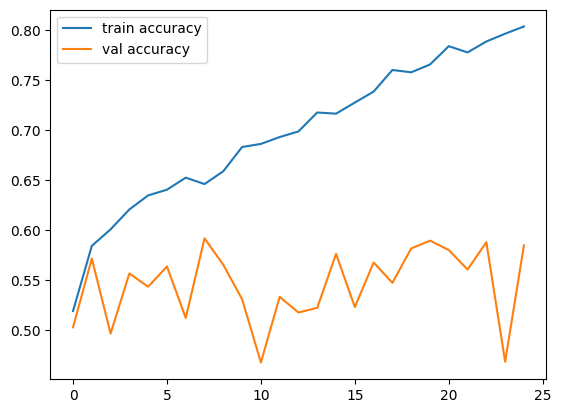

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 176, 208, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 182, 214, 3)  0           ['input_14[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 88, 104, 64)  9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 88, 104, 64)  256         ['conv1_conv[0][0]']      

In [14]:
#Importing necessary modules
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import EarlyStopping
from glob import glob
import matplotlib.pyplot as plt
#Data Preprocessing
IMAGE_SIZE = [176,208]
train_path = 'D:\\F\\Coding\\Projects\\Disease\\Dataset\\Alzheimer\\Alzheimer_s Dataset\\train'
test_path = 'D:\\F\Coding\\Projects\\Disease\\Dataset\\Alzheimer\\Alzheimer_s Dataset\\test'

train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range = 0.2,shear_range = 0.2,horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
train_set = train_datagen.flow_from_directory(train_path,batch_size = 25,target_size = IMAGE_SIZE,class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_path,batch_size = 25,target_size = IMAGE_SIZE,class_mode = 'categorical')

#Model Architecture
cnn = ResNet50(input_shape = IMAGE_SIZE+[3],weights = 'imagenet',include_top = False)

for layer in cnn.layers:
    layer.trainable = False

folder = glob('D:\\F\\Coding\\Projects\\Disease\\Dataset\\Alzheimer\\Alzheimer_s Dataset\\train\\*')
x = Flatten()(cnn.output)
x = BatchNormalization()(x)
x = Dense(512,kernel_initializer = 'he_uniform',activation = 'relu')(x)
x = Dense(128,kernel_initializer = 'he_uniform',activation = 'relu')(x)
x = Dense(32,kernel_initializer = 'he_uniform',activation = 'relu')(x)
x = BatchNormalization()(x)
result = Dense(len(folder),activation = 'softmax')(x)

#Building model
model = Model(inputs = cnn.input, outputs = result)

r = model.compile(loss = 'categorical_crossentropy',optimizer ='adam',metrics = ['accuracy'])
# early_stopping = EarlyStopping()
p = model.fit(train_set,validation_data = test_set,epochs = 25,steps_per_epoch = len(train_set),validation_steps = len(test_set))
#plotting loss
plt.plot(p.history['loss'],label = 'train loss')
plt.plot(p.history['val_loss'],label = 'val loss')
plt.legend()
plt.show()
#plotting accuracy
plt.plot(p.history['accuracy'],label = 'train accuracy')
plt.plot(p.history['val_accuracy'],label = 'val accuracy')
plt.legend()
plt.show()
model.summary()

In [ ]:
#Saving our model

In [2]:
model.save('alzheimer.h5')

NameError: name 'model' is not defined

In [1]:
# Making predictions
y_pred =  model.predict(test_set)

NameError: name 'model' is not defined